In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/Gyroboy/mirea_aie_raynor/refs/heads/main/homeworks/HW02/S02-hw-dataset.csv")
df.head(10)
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


In [4]:
empty = df.isna().mean()

doubles = df.duplicated()
doubles

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40     True
dtype: bool

In [5]:
age_check = (df['age'] < 0) | (df['age'] > 100)
negative_check = (df['user_id'] < 0)|(df['purchases'] < 0)|(df['revenue'] < 0)
revenue_check_1 = (df['revenue'] == 0) & (df['purchases'] > 0)
revenue_check_2 = (df['revenue'] > 0) & (df['purchases'] == 0)
final = (age_check | negative_check | revenue_check_1 | revenue_check_2)
df[final]

# в результате проверки были обноружены следующие проблемы.
# в датасете присутствуют нереалистичные значения возраста (5 строка, 120 лет).
# также выявлены ошибки количества покупок и выручки: отрицательное количество покупок при положительной выручке и наличие этих самых покупок при нулевой выручке.
# кроме того, обнаружен дубликат 9 строки и пропущенное значение в поле age.

# таким образом, датасет содержит пропуски, ошибки в контроле купли/продажи и дубликаты, что может негативно сказаться на результатах последующей работы с датасетом.

,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785
10,11,24.0,US,4,0


In [6]:
df['country'].value_counts()

country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64

In [7]:
df.groupby('country').agg({'age' : 'mean', 'purchases' : 'sum'})

,age,purchases
country,,
CN,24.000000,9
DE,34.600000,39
FR,46.250000,51
RU,30.076923,62
US,36.714286,37


In [8]:
bins = pd.cut(df['age'], bins= [0, 20, 40, 60, 80, 120])
df.groupby(bins)['purchases'].mean()

# по распределению переменных по странам видно, что преобладают пользователи из России и Франции.
# группировка по странам показала заметные различие: самые активные пользвоатели во Франции, самые неактивные в Китае.
# молодые пользователи (0-20 и 20-40 лет) совершают больше покупок, тогда как у старшего поколения (60-80 лет) активность в покупках практически отсутствует.

# также присутствуют и неожиданные эффекты. например, отрицательное значение покупок в возрасте 80-120 лет. это связано с ошибками данных.
# это подтверждает необходимость дальнейшей очистки и доработки датасета перед его использованием в анализе или обучении модели искуственного интеллекта.

C:\Users\RaynoR\AppData\Local\Temp\ipykernel_75840\3145251965.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(bins)['purchases'].mean()


age
(0, 20]      6.333333
(20, 40]     5.086957
(40, 60]     4.000000
(60, 80]          NaN
(80, 120]   -1.000000
Name: purchases, dtype: float64

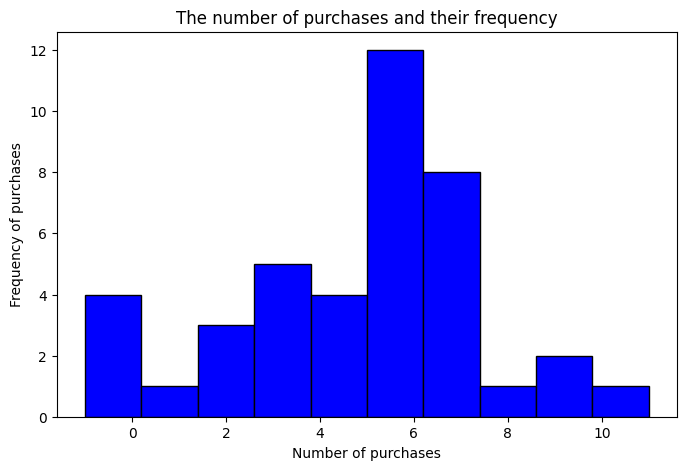

<Figure size 640x480 with 0 Axes>

In [9]:
plt.figure(figsize = (8, 5))
plt.hist(df['purchases'], bins = 10, color = 'blue', edgecolor = 'black')
plt.title('The number of purchases and their frequency')
plt.xlabel('Number of purchases')
plt.ylabel('Frequency of purchases')
plt.show()
plt.savefig("hist.png", dpi=300)

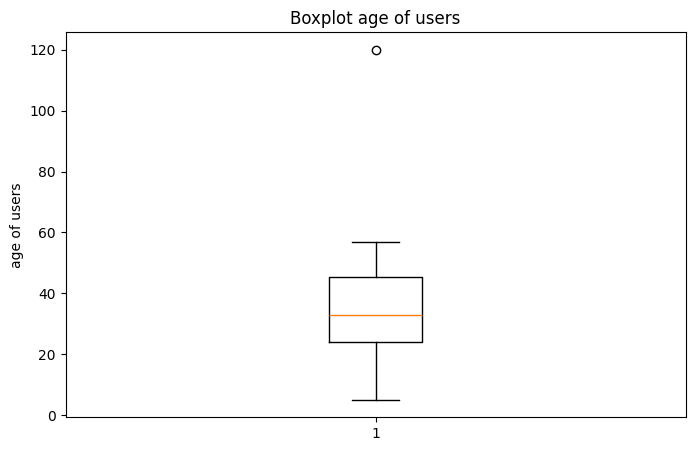

In [10]:
plt.figure(figsize = (8, 5))
plt.boxplot(df['age'].dropna(), vert = True)
plt.title('Boxplot age of users')
plt.ylabel('age of users')
plt.savefig("boxplot", dpi=300)
plt.show()

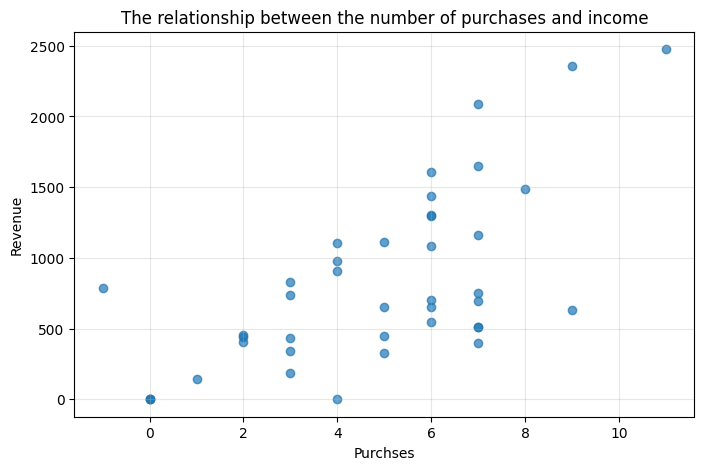

In [11]:
plt.figure(figsize = (8, 5))
plt.scatter(df['purchases'], df['revenue'], alpha = 0.7)

plt.title('The relationship between the number of purchases and income')
plt.xlabel('Purchses')
plt.ylabel('Revenue')
plt.grid(alpha = 0.3)
plt.savefig("scatter.png", dpi=300)
plt.show()